## 最適制御問題

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

[参考文献] Numerical solution of optimal control problems by an iterative scheme, M. Keyanpour and M. Azizsefat

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル変数の設定

In [2]:
δ = 0.05
β = 20.0

20.0

### 放射基底関数の準備

In [3]:
function rbf_func(x, θ)
    rbf(x, β) = exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

rbf_func (generic function with 1 method)

In [4]:
function d_rbf_func(x, θ)
    d_rbf(x, β) = -2β*x*exp(-β*x^2)
    s = 0.0
    for i in 1:length(θ)
        s += θ[i]*d_rbf(x - δ*(i-1)+0.5, β)
    end
    return s
end

d_rbf_func (generic function with 1 method)

### 微分可能数値積分モジュール

In [5]:
function Integrate(T, N, θ)
    dt = T/N
    J = 0.0
    x = 1.0
    for i in 1:N
        u = rbf_func(i*dt, θ)      
        x = x + u*dt 
        F = x^2 + u^2
        J += F*dt
    end
    return J
end

Integrate (generic function with 1 method)

### 学習プロセス

In [6]:
N = 200
T = 1.0
opt = Flux.ADAM(0.1) 
θ_train = ones(50)

ps = Flux.params(θ_train)
train_itr = 200

function train(T, N, θ, ps)
    for i in 1:train_itr
        gs = Flux.gradient(ps) do
            Integrate(T, N, θ)
        end
        Flux.Optimise.update!(opt, ps, gs)
        println(Integrate(T, N, θ))
    end
end

train (generic function with 1 method)

In [7]:
train(T, N, θ_train, ps)

76.15275253499763
61.14302727539029
47.88818478533559
36.394647105503296
26.65033394368506
18.6207007543165
12.244703081342031
7.431148946530126
4.056132183212022
1.9624430434481273
0.9619201463617689
0.8415051708124512
1.373194273914026
2.3271936180054316
3.4866298481757423
4.6615293329918055
5.699786453314427
6.493531968841872
6.980400956300885
7.140250441146239
6.988556518465473
6.567933527034188
5.939068803347219
5.172039068453603
4.338625624196713
3.5059631994283014
2.731666307968418
2.060463860795948
1.5223089700650747
1.1318877720592397
0.8894076447761838
0.7824911227352331
0.788938099809621
0.8800561131487381
1.0242127701267385
1.190251688133108
1.350443415121674
1.4827151422887597
1.5720064001697256
1.6107139566127853
1.598297939118602
1.5402068566308842
1.4463328756450282
1.3292290006688812
1.2023108758902512
1.0782348311121936
0.9675982163870883
0.8780549291385649
0.8138840881954219
0.7759978063095662
0.7623290278938852
0.7685059409991642
0.7886982879552623
0.816514530450626

### 厳密解と数値解の表示

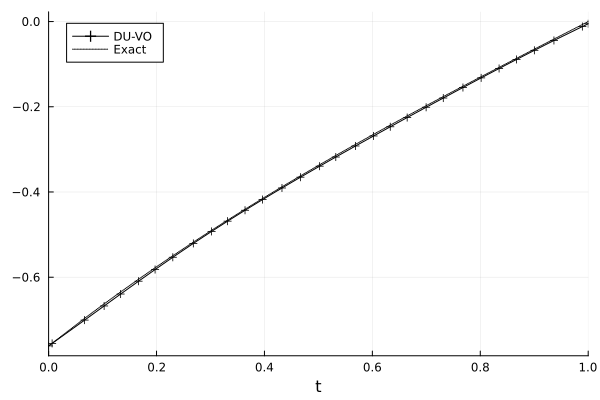

In [8]:
plot(x->rbf_func(x, θ_train),  lw=1, xlims=[0,1],label="DU-VO", xlabel="t",color=:black, legend=:topleft, marker=:+)
plot!(t->-sinh(1-t)/(cosh(1.0)), lw=1, label="Exact",color=:black, ls=:dot)

In [9]:
savefig("DU-VO.pdf")